In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [36]:
root_path='/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images'

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense, Flatten

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline

In [ ]:
#import tensorflow as tf
#tf.test.gpu_device_name()

''

In [39]:
#Initialising the CNN
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=4, activation='sigmoid'))

#classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [42]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='categorical')
testing_set=test_datagen.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='categorical')

Found 160 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [43]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [44]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
#import h5py

In [ ]:
#after how meny ipocs our
#erl_stop=EarlyStopping(monitor='val_loss',patience=6,restore_best_weights=True)
#mod_chk=ModelCheckpoint(filepath="content/drive/MyDrive/achrive/my_model.hdf5",monitor="val_loss",save_best_only=True)
#lr_rate=ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.1)


In [46]:
hist=classifier.fit_generator(training_set,epochs=50,validation_data=training_set)
                              #callbacks=[erl_stop,mod_chk,lr_rate],verbose=2)
                              #shuffle=True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
5/5 [==============================] - 10s 2s/step - loss: 0.2166 - accuracy: 0.9438 - val_loss: 0.2181 - val_accuracy: 0.9187
Epoch 2/50
5/5 [==============================] - 9s 2s/step - loss: 0.2606 - accuracy: 0.9000 - val_loss: 0.2468 - val_accuracy: 0.9125
Epoch 3/50
5/5 [==============================] - 9s 2s/step - loss: 0.2554 - accuracy: 0.9250 - val_loss: 0.2049 - val_accuracy: 0.9312
Epoch 4/50
5/5 [==============================] - 9s 2s/step - loss: 0.2501 - accuracy: 0.9000 - val_loss: 0.2105 - val_accuracy: 0.9375
Epoch 5/50
5/5 [==============================] - 9s 2s/step - loss: 0.2360 - accuracy: 0.9062 - val_loss: 0.2270 - val_accuracy: 0.9187
Epoch 6/50
5/5 [==============================] - 9s 2s/step - loss: 0.1868 - accuracy: 0.9438 - val_loss: 0.2082 - val_accuracy: 0.9312
Epoch 7/50
5/5 [==============================] - 9s 2s/step - loss: 0.2513 - accuracy: 0.9250 - val_loss: 0.1860 - val_accuracy: 0.9500
Epoch 8/50
5/5 [========================

In [ ]:
#20th jan
#Epoch 10/10
#5/5 [==============================] - 9s 2s/step - loss: 1.1107 - accuracy: 0.4500 - val_loss: 1.0767 - val_accuracy: 0.4812
#Epoch 15/15
#5/5 [==============================] - 9s 2s/step - loss: 0.6773 - accuracy: 0.7250 - val_loss: 0.7577 - val_accuracy: 0.6750
#Epoch 20/20
#5/5 [==============================] - 9s 2s/step - loss: 0.4416 - accuracy: 0.8313 - val_loss: 0.4524 - val_accuracy: 0.8375
#Epoch 25/25
#5/5 [==============================] - 9s 2s/step - loss: 0.2281 - accuracy: 0.9250 - val_loss: 0.1974 - val_accuracy: 0.9125
#Epoch 30/30
#5/5 [==============================] - 9s 2s/step - loss: 0.1027 - accuracy: 0.9688 - val_loss: 0.1250 - val_accuracy: 0.9688
#Epoch 35/35
#5/5 [==============================] - 9s 2s/step - loss: 0.0562 - accuracy: 0.9937 - val_loss: 0.0424 - val_accuracy: 0.9
#Epoch 40/40
#5/5 [==============================] - 9s 2s/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 0.9937
#Epoch 35/35
#5/5 [==============================] - 9s 2s/step - loss: 0.0758 - accuracy: 0.9688 - val_loss: 0.1011 - val_accuracy: 0.9750
#Epoch 50/50
#5/5 [==============================] - 10s 2s/step - loss: 0.0711 - accuracy: 0.9812 - val_loss: 0.0954 - val_accuracy: 0.9750


Text(0, 0.5, 'Train and test loss epochs')

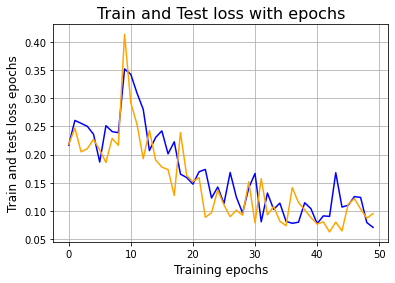

In [47]:
#ploting trsults with accuracy
plt.plot(hist.history['loss'],color='blue',label='train')
plt.plot(hist.history['val_loss'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test loss with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test loss epochs',fontsize=12)


Text(0, 0.5, 'Train and test accuracy')

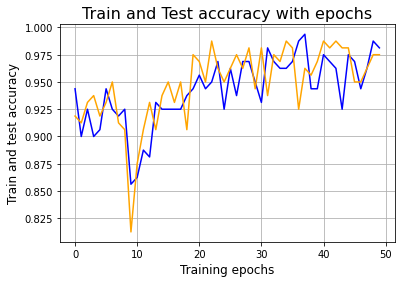

In [48]:
#ploting trsults with accuracy
plt.plot(hist.history['accuracy'],color='blue',label='train')
plt.plot(hist.history['val_accuracy'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test accuracy with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test accuracy',fontsize=12)


In [19]:
#acc=classifier.evaluate(testing_set,steps=len(testing_set),verbose=2)
#print('%.2f'%(acc[1]*100))

3/3 - 45s - loss: 3.9808 - accuracy: 0.4125 - 45s/epoch - 15s/step
41.25
